In [33]:
!pip install sentence_transformers

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [35]:
data = pd.read_csv('Mapping_kategori_topik_AlQuran_Sheet2.csv')
# Check for typos and extra spaces in the column name. You can print the column names using the following line:
print(data.columns)

Index(['id', 'surah', 'ayat', 'terjemah', 'topik'], dtype='object')


In [36]:
X = np.array(data.topik)

In [37]:
data = data[['surah','ayat','terjemah','topik']]
data.head()

,surah,ayat,terjemah,topik
0,Al-Fatihah,1.0,Dengan menyebut nama Allah Yang Maha Pemurah l...,"ibadah, iman, akhlak dan adab"
1,Al-Fatihah,2.0,Segala puji bagi Allah Tuhan semesta alam,"ibadah, iman"
2,Al-Fatihah,3.0,Maha Pemurah lagi Maha Penyayang,iman
3,Al-Fatihah,4.0,Yang menguasai hari pembalasan.,iman
4,Al-Fatihah,5.0,Hanya kepada Engkaulah kami menyembah dan hany...,"ibadah,iman"


In [38]:
data = data.dropna()

In [39]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/195 [00:00<?, ?it/s]

In [40]:
embed_data = embeddings

In [41]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.364301,5.749604,-2.319180,0.044709,-0.845832
1,-2.371671,1.735114,-0.503101,0.852846,-0.478119
2,-6.249431,-1.658501,-0.989113,0.244434,0.104915
3,-6.249431,-1.658501,-0.989113,0.244434,0.104915
4,-2.371671,1.735114,-0.503101,0.852846,-0.478119


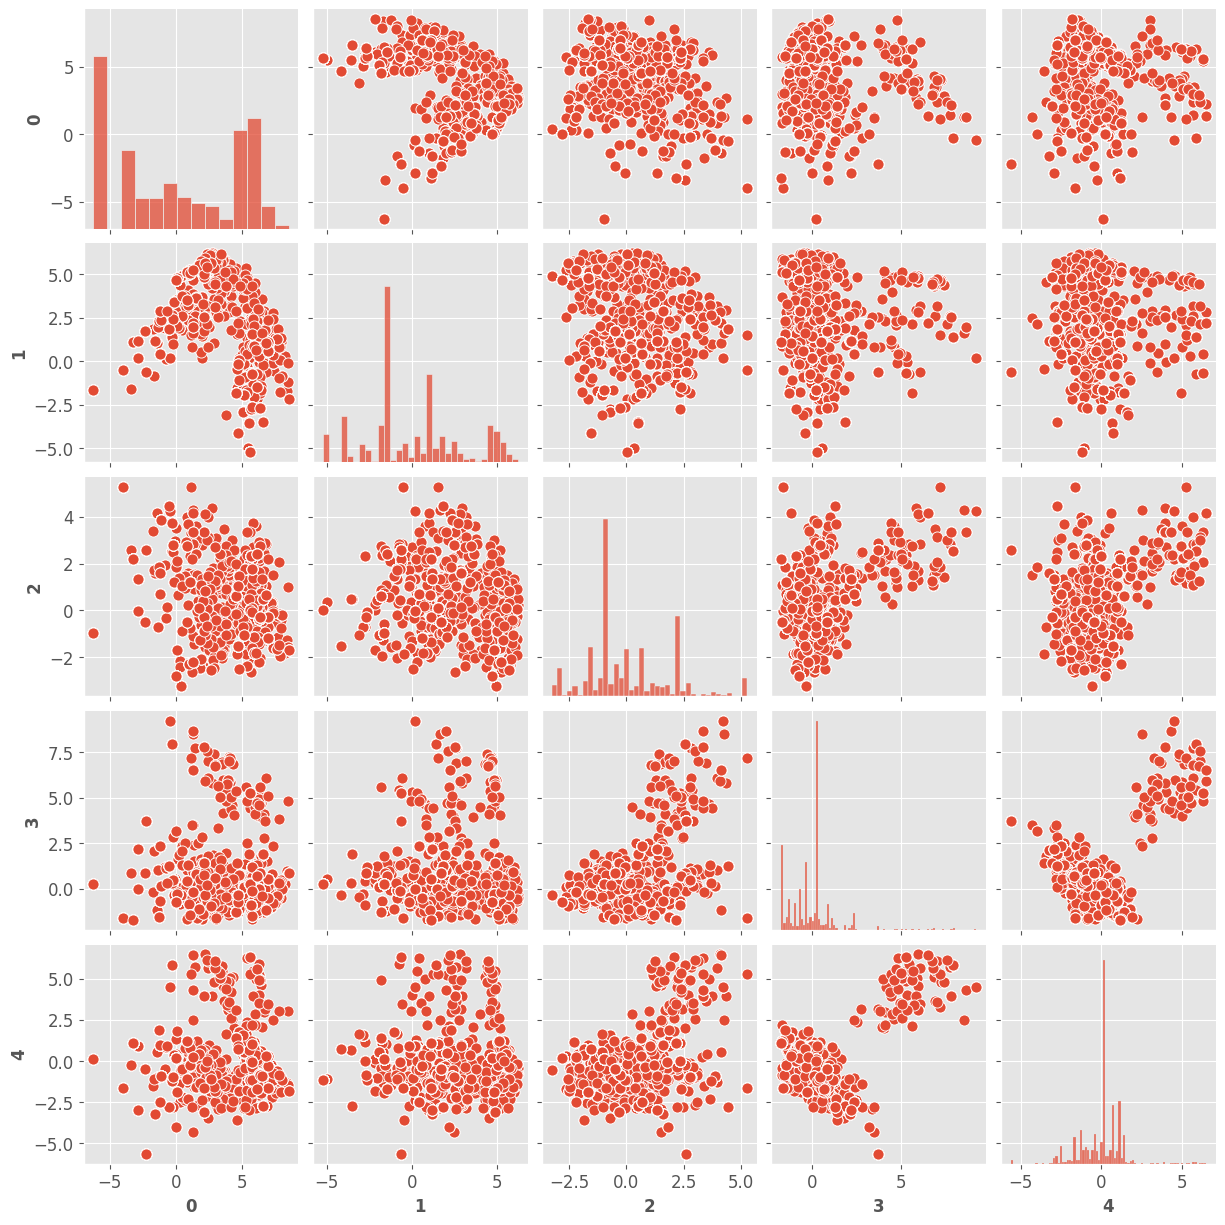

In [42]:
sns.pairplot(pca_data)

In [43]:
data

,surah,ayat,terjemah,topik
0,Al-Fatihah,1.0,Dengan menyebut nama Allah Yang Maha Pemurah l...,"ibadah, iman, akhlak dan adab"
1,Al-Fatihah,2.0,Segala puji bagi Allah Tuhan semesta alam,"ibadah, iman"
2,Al-Fatihah,3.0,Maha Pemurah lagi Maha Penyayang,iman
3,Al-Fatihah,4.0,Yang menguasai hari pembalasan.,iman
4,Al-Fatihah,5.0,Hanya kepada Engkaulah kami menyembah dan hany...,"ibadah,iman"
...,...,...,...,...
6231,An Nas,2.0,Raja manusia.,"ibadah, iman"
6232,An Nas,3.0,Sembahan manusia.,"ibadah, iman"
6233,An Nas,4.0,dari kejahatan (bisikan) setan yang biasa bers...,"ibadah, iman"
6234,An Nas,5.0,yang membisikkan (kejahatan) ke dalam dada man...,"ibadah, iman"


In [70]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_genres =False):
  index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  ayat_recomm = data['terjemah'].loc[index_recomm].values
  result = {'Ayat':ayat_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The preferred ayat is: %s \n'%(data['terjemah'].loc[index]))
    k=1
    for ayat in ayat_recomm:
      print('The number %i recommended ayat: %s \n' % (k, ayat))
      k += 1  # Increment k for the next item
  if print_genres==True:
    print('The surah of the preferred ayat is:\n %s \n'%(data['surah'].loc[index]))
    k=1
    for q in range(len(ayat_recomm)):
      plot_q = data['surah'].loc[index_recomm[q]]
      print('The surah of the number %i recommended ayat is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

In [71]:
give_recommendations(4913, True, True)

The preferred ayat is: Maka nikmat Tuhan kamu yang manakah yang kamu dustakan? 

The number 1 recommended ayat: Dan gunung-gunung menjadi seperti bulu (yang beterbangan) 

The number 2 recommended ayat: Pada hari ketika langit menjadi seperti luluhan perak. 

The number 3 recommended ayat: Seseorang peminta telah meminta kedatangan azab yang bakal terjadi 

The number 4 recommended ayat: dan dibukalah langit maka terdapatlah beberapa pintu 

The number 5 recommended ayat: dan dijalankanlah gunung-gunung maka menjadi fatamorganalah ia. 

The surah of the preferred ayat is:
 Ar Rahman 

The surah of the number 1 recommended ayat is this one:
 Al Maarij 

The surah of the number 2 recommended ayat is this one:
 Al Maarij 

The surah of the number 3 recommended ayat is this one:
 Al Maarij 

The surah of the number 4 recommended ayat is this one:
 An Naba 

The surah of the number 5 recommended ayat is this one:
 An Naba 



{'Ayat': array(['Dan gunung-gunung menjadi seperti bulu (yang beterbangan)',
        'Pada hari ketika langit menjadi seperti luluhan perak.',
        'Seseorang peminta telah meminta kedatangan azab yang bakal terjadi',
        'dan dibukalah langit maka terdapatlah beberapa pintu',
        'dan dijalankanlah gunung-gunung maka menjadi fatamorganalah ia.'],
       dtype=object),
 'Index': [5383, 5382, 5375, 5690, 5691]}

In [59]:
recomm_list = []
for i in range(1900):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Ayat'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Preffered Ayat'] = data['terjemah']
recomm_data = recomm_data[['Preffered Ayat','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [60]:
recomm_data.sample(frac=1).head()

,Preffered Ayat,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
1765,di hadapannya ada Jahanam dan dia akan diberi ...,Kecelakaan yang besarlah pada hari itu bagi or...,Di dalam kedua surga itu ada dua buah mata air...,kedua surga itu mempunyai pohon-pohonan dan bu...,Sesungguhnya kepunyaan Allah-lah kerajaan lang...,Mereka berkeliling di antaranya dan di antara ...
1237,Dan (inilah) suatu permakluman dari Allah dan ...,Tiada dosa (lantaran tidak pergi berjihad) ata...,Hai Nabi kobarkanlah semangat para mukmin itu ...,Sebahagian besar Ahli Kitab menginginkan agar ...,Hai orang-orang yang beriman apabila kamu perg...,Sekarang Allah telah meringankan kepadamu dan ...
107,Dan setelah datang kepada mereka seorang Rasul...,(yaitu) Tuhan Musa dan Harun.,Musa berkata: Tuhan yang menguasai timur dan b...,Dan Kami iringkan jejak mereka (nabi-nabi Bani...,sebagai bimbingan yang lurus untuk memperingat...,Dan sesungguhnya telah Kami berikan kepada Mus...
131,Dan (ingatlah) ketika Kami menjadikan rumah it...,dan kamu (Muhammad) bertempat di kota Mekah ini,Dan pada sebagian dari malam maka sujudlah kep...,bangunlah (untuk sembahyang) di malam hari kec...,Dan ia tidak mau membenarkan (Rasul dan Al Qur...,Kelak mereka akan bersumpah kepadamu dengan na...
1548,Hai Ibrahim tinggalkanlah soal jawab ini sesun...,Firaun berkata: Apakah kamu sekalian beriman k...,Sesungguhnya hampirlah ia menyesatkan kita dar...,Dan (ingatlah) akan hari (ketika) Kami bangkit...,Maka berselisihlah golongan-golongan (yang ter...,Sesungguhnya Allah Dialah Tuhanku dan Tuhan ka...
